In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [119]:
df = pd.read_csv('promotions_1002.csv', encoding='ISO-8859-1', dtype={'article':'str','article_text':'str', 'sales_profit': 'float'})
df.head()

,article,article_text,promo_page_number,promo_priority,promo_id,promo_name,promo_start_date,promo_end_date,sales_org,promo_number_of_pages,promo_duration_days,article_scale_price_historical,promo_promotion_sales_price,promo_standard_sales_price,sales_profit,sales_quantity,sales_excluding_tax
0,000000000007321990,DCS HANNE Sateen SGL grey/blue,6.0,71.0,1002000612,TV1002 20201002 Sleeping D,20201011,20201017,1002,7,7,0.0,200.0,269.0,4975.91,52.0,8281.6
1,000000000005529009,RB TESSE 60x170 transparent white,13.0,21.0,1002000633,CP1002 20210103 Winter Sale DCP,20210117,20210130,1002,16,14,0.0,100.0,169.0,912.38,22.0,1593.6
2,000000000005403906,PB SALTHOLM 130x130 grey,9.0,65.0,1002000745,CP1002 20211103 Christmas,20211115,20211124,1002,16,10,0.0,190.0,379.0,NaN,NaN,NaN
3,000000000003526132,HB 90x125cm HØIE Grey-23,8.0,60.0,7104,LP1002 20210527 S760 New Opening,20210524,20210602,1002,16,10,NaN,1500.0,2999.0,0.00,0.0,0.0
4,000000000002738600,SC Poly GUDHEM 150x200cm grey,15.0,36.0,7101,LP1002 20210225 S724 Opening paper,20210222,20210303,1002,16,10,NaN,50.0,129.0,236.04,11.0,440.0


In [183]:
df.describe()

,promo_page_number,promo_priority,promo_id,promo_end_date,sales_org,promo_number_of_pages,promo_duration_days,article_scale_price_historical,promo_promotion_sales_price,promo_standard_sales_price,sales_profit,sales_quantity,sales_excluding_tax,month
count,122897.000000,122897.000000,1.228970e+05,1.228970e+05,122897.0,122897.000000,122897.000000,122897.000000,122897.000000,122897.000000,1.228970e+05,122897.000000,1.228970e+05,122897.000000
mean,10.908728,48.439449,1.002001e+09,2.020495e+07,1002.0,16.403655,10.678161,29.752444,1259.383235,2121.965586,2.154174e+04,195.366140,3.969724e+04,6.129564
std,7.876623,22.620278,9.022806e+01,4.906329e+03,0.0,9.116253,4.920230,155.697403,2216.223238,4134.609849,5.750191e+04,695.786265,1.116950e+05,3.322564
min,0.000000,0.000000,1.002000e+09,2.020010e+07,1002.0,0.000000,3.000000,0.000000,5.000000,5.000000,-8.470545e+04,-17.000000,-1.683520e+04,1.000000
25%,4.000000,23.000000,1.002000e+09,2.020061e+07,1002.0,7.000000,7.000000,0.000000,125.000000,199.000000,2.994470e+03,12.000000,5.523360e+03,3.000000
50%,10.000000,60.000000,1.002001e+09,2.020113e+07,1002.0,16.000000,14.000000,0.000000,350.000000,549.000000,8.154140e+03,56.000000,1.440000e+04,6.000000
75%,16.000000,68.000000,1.002001e+09,2.021043e+07,1002.0,24.000000,14.000000,0.000000,1450.000000,2199.000000,2.061586e+04,183.000000,3.649888e+04,9.000000
max,32.000000,80.000000,1.002001e+09,2.021112e+07,1002.0,32.000000,32.000000,3249.500000,30000.000000,59999.000000,3.982281e+06,58298.000000,1.052568e+07,12.000000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122897 entries, 0 to 296810
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   article                         122897 non-null  object        
 1   article_text                    122897 non-null  object        
 2   promo_page_number               122897 non-null  float64       
 3   promo_priority                  122897 non-null  float64       
 4   promo_id                        122897 non-null  int64         
 5   promo_name                      122897 non-null  object        
 6   promo_start_date                122897 non-null  datetime64[ns]
 7   promo_end_date                  122897 non-null  int64         
 8   sales_org                       122897 non-null  int64         
 9   promo_number_of_pages           122897 non-null  int64         
 10  promo_duration_days             122897 non-null  int64  

In [120]:
df.isnull().sum()

article                                0
article_text                           0
promo_page_number                   5614
promo_priority                      5614
promo_id                               0
promo_name                             0
promo_start_date                       0
promo_end_date                         0
sales_org                              0
promo_number_of_pages                  0
promo_duration_days                    0
article_scale_price_historical    136223
promo_promotion_sales_price         6770
promo_standard_sales_price          6770
sales_profit                      104753
sales_quantity                    104753
sales_excluding_tax               104753
dtype: int64

In [121]:
df[df['sales_excluding_tax'].isna()].head()

,article,article_text,promo_page_number,promo_priority,promo_id,promo_name,promo_start_date,promo_end_date,sales_org,promo_number_of_pages,promo_duration_days,article_scale_price_historical,promo_promotion_sales_price,promo_standard_sales_price,sales_profit,sales_quantity,sales_excluding_tax
2,000000000005403906,PB SALTHOLM 130x130 grey,9.0,65.0,1002000745,CP1002 20211103 Christmas,20211115,20211124,1002,16,10,0.0,190.0,379.0,NaN,NaN,NaN
5,000000000003365181,MA 180x200cm GOLD B60 foam Grey-40,5.0,23.0,1002000756,CP1002 20220104 Great Offers,20220124,20220206,1002,16,14,0.0,11000.0,21999.0,NaN,NaN,NaN
11,000000000003696651,Wardrobe VINDERUP 100x200 combi oak,5.0,60.0,1002000461,CP1002 20200104 Sale,20200119,20200201,1002,16,14,0.0,2000.0,2499.0,NaN,NaN,NaN
14,000000000003600920,Bench AALESTRUP w/cushion black,6.0,60.0,7102,LP1002 20210429 S759 New opening paper,20210426,20210505,1002,16,10,NaN,300.0,599.0,NaN,NaN,NaN
15,000000000003538457,HB 140x125cm H30 CURVE Grey-26,4.0,60.0,1002000593,CP1002 20201105 Black Friday,20201126,20201129,1002,16,4,0.0,1800.0,2799.0,NaN,NaN,NaN


In [122]:
df = df.dropna()

In [123]:
df.isnull().sum()

article                           0
article_text                      0
promo_page_number                 0
promo_priority                    0
promo_id                          0
promo_name                        0
promo_start_date                  0
promo_end_date                    0
sales_org                         0
promo_number_of_pages             0
promo_duration_days               0
article_scale_price_historical    0
promo_promotion_sales_price       0
promo_standard_sales_price        0
sales_profit                      0
sales_quantity                    0
sales_excluding_tax               0
dtype: int64

In [150]:
product_group = df.groupby('article_text')
product_group.sales_excluding_tax.sum().nlargest(10)

article_text
Lounge set ULLEHUSE 6 pers. black         47624735.02
Lounge set TAMBOHUSE 5 pers. grey         29964504.10
Lounge set VONGE 5 pers. black            28105776.59
PIL 800g Høie DOWNFEEL 50x60cm            26899440.70
Sofa bed chaiselongue VEJLBY dark grey    26378082.87
PIL 650g Varnamo KEISAREN 50x60cm         25954978.63
DUV 7 kg CURA PEARL 150x210cm             22823966.51
TM 180x200cm GOLD T65 white/light grey    22628725.19
TM 180x200cm GOLD T110 WELLPUR            22179423.16
Stacking chair GUDHJEM black              21235671.32
Name: sales_excluding_tax, dtype: float64

In [152]:
prod11 = df.loc[df['article_text'] == 'PIL 650g Varnamo KEISAREN 50x60cm'] 
prod11

,article,article_text,promo_page_number,promo_priority,promo_id,promo_name,promo_start_date,promo_end_date,sales_org,promo_number_of_pages,promo_duration_days,article_scale_price_historical,promo_promotion_sales_price,promo_standard_sales_price,sales_profit,sales_quantity,sales_excluding_tax,month
7481,000000000004306002,PIL 650g Varnamo KEISAREN 50x60cm,2.0,71.0,1002000668,CP1002 20210104 DME,2021-01-24,20210126,1002,3,3,324.5,275.0,449.0,32255.31,179.0,39256.00,1
7719,000000000004306002,PIL 650g Varnamo KEISAREN 50x60cm,15.0,11.0,1002000490,CP1002 20200802 GF Rea+AGO,2020-08-09,20200822,1002,24,14,324.5,225.0,449.0,464925.79,3316.0,594614.46,8
11108,000000000004306002,PIL 650g Varnamo KEISAREN 50x60cm,11.0,23.0,1002000587,CP1002 20200903 Inspiration & AGO,2020-09-20,20201003,1002,16,14,324.5,175.0,449.0,293191.39,2908.0,406923.20,9
19056,000000000004306002,PIL 650g Varnamo KEISAREN 50x60cm,6.0,69.0,1002000483,CP1002 20200604 Sale,2020-06-21,20200704,1002,16,14,324.5,135.0,449.0,269720.78,3942.0,423890.92,6
23258,000000000004306002,PIL 650g Varnamo KEISAREN 50x60cm,2.0,71.0,1002000498,TV1002 20200702 MaE,2020-07-12,20200714,1002,3,3,324.5,275.0,449.0,46306.70,277.0,57140.16,7
27274,000000000004306002,PIL 650g Varnamo KEISAREN 50x60cm,0.0,0.0,1002000578,OOT1002 202106 Theme Sale 1,2021-06-06,20210703,1002,0,28,299.5,135.0,399.0,3397168.16,50215.0,5361076.81,6
30113,000000000004306002,PIL 650g Varnamo KEISAREN 50x60cm,1.0,33.0,1002000740,CP1002 20211004 Christmas,2021-10-25,20211107,1002,32,14,299.5,200.0,399.0,258963.20,2151.0,343088.81,10
33510,000000000004306002,PIL 650g Varnamo KEISAREN 50x60cm,14.0,23.0,1002000742,CP1002 20210901 News & Great Offers,2021-09-06,20210919,1002,16,14,299.5,200.0,399.0,232682.44,1943.0,308673.15,9
34500,000000000004306002,PIL 650g Varnamo KEISAREN 50x60cm,0.0,0.0,1002000406,MO1002 202006 Monthly offer June,2020-06-01,20200630,1002,0,30,324.5,135.0,449.0,3982281.47,58298.0,6262313.00,6
39613,000000000004306002,PIL 650g Varnamo KEISAREN 50x60cm,4.0,70.0,1002000680,TV1002 20210401 Sleeping D,2021-04-04,20210410,1002,7,7,324.5,275.0,449.0,79117.55,435.0,96130.40,4


In [153]:
prod21 = df.loc[df['article_text'] == 'PIL 650g KUNNA 50x60cm'] 
prod21

,article,article_text,promo_page_number,promo_priority,promo_id,promo_name,promo_start_date,promo_end_date,sales_org,promo_number_of_pages,promo_duration_days,article_scale_price_historical,promo_promotion_sales_price,promo_standard_sales_price,sales_profit,sales_quantity,sales_excluding_tax,month
19494,000000000004317502,PIL 650g KUNNA 50x60cm,5.0,71.0,1002000609,TV1002 20200902 DMD,2020-09-13,20200919,1002,5,7,74.5,65.0,99.0,67629.01,2029.0,105133.72,9
21859,000000000004317502,PIL 650g KUNNA 50x60cm,2.0,71.0,1002000668,CP1002 20210104 DME,2021-01-24,20210126,1002,3,3,74.5,65.0,99.0,30554.27,909.0,47103.28,1
28600,000000000004317502,PIL 650g KUNNA 50x60cm,9.0,11.0,1002000734,CP1002 20210902 News & Great Offers,2021-09-13,20210922,1002,24,10,79.5,55.0,109.0,235085.97,9302.0,408001.76,9
31875,000000000004317502,PIL 650g KUNNA 50x60cm,24.0,71.0,1002000617,TV1002 20201103 DME,2020-11-15,20201117,1002,24,3,74.5,65.0,99.0,28259.29,848.0,44047.52,11
37203,000000000004317502,PIL 650g KUNNA 50x60cm,16.0,66.0,1002000462,CP1002 20200105 Sale,2020-01-26,20200201,1002,16,7,74.5,65.0,99.0,37981.91,1162.0,59790.80,1
47767,000000000004317502,PIL 650g KUNNA 50x60cm,24.0,11.0,1002000739,CP1002 20211003 30 years anniversary DCP,2021-10-18,20211024,1002,24,7,79.5,55.0,109.0,168362.83,6720.0,294764.80,10
51961,000000000004317502,PIL 650g KUNNA 50x60cm,2.0,65.0,1002000537,TV1002 20200302 Sleeping D,2020-03-12,20200315,1002,15,4,74.5,65.0,99.0,31415.07,939.0,48791.68,3
57760,000000000004317502,PIL 650g KUNNA 50x60cm,5.0,60.0,1002000612,TV1002 20201002 Sleeping D,2020-10-11,20201017,1002,7,7,74.5,65.0,99.0,112349.30,3384.0,175344.68,10
58068,000000000004317502,PIL 650g KUNNA 50x60cm,2.0,65.0,1002000616,TV1002 20201102 Singles D,2020-11-08,20201111,1002,7,4,74.5,65.0,99.0,44855.46,1348.0,69967.04,11
58480,000000000004317502,PIL 650g KUNNA 50x60cm,9.0,22.0,1002000648,CP1002 20210502 3000 Stores,2021-05-09,20210522,1002,23,14,74.5,45.0,99.0,187363.89,10575.0,379172.93,5


In [154]:
prod31 = df.loc[df['article_text'] == 'PIL 500g ROYAL NORDIC 50x60cm'] 
prod31

,article,article_text,promo_page_number,promo_priority,promo_id,promo_name,promo_start_date,promo_end_date,sales_org,promo_number_of_pages,promo_duration_days,article_scale_price_historical,promo_promotion_sales_price,promo_standard_sales_price,sales_profit,sales_quantity,sales_excluding_tax,month
5633,000000000004302102,PIL 500g ROYAL NORDIC 50x60cm,0.0,0.0,1002000575,MO1002 202103 Monthly offer March,2021-03-01,20210331,1002,0,31,299.5,120.0,399.0,1687097.64,35870.0,3433927.31,3
6899,000000000004302102,PIL 500g ROYAL NORDIC 50x60cm,14.0,25.0,1002000645,CP1002 20210403 Great Offers,2021-04-18,20210501,1002,24,14,274.5,150.0,369.0,133823.48,1886.0,225529.60,4
17421,000000000004302102,PIL 500g ROYAL NORDIC 50x60cm,12.0,24.0,1002000655,CP1002 20210604 Summer Sale,2021-06-27,20210703,1002,15,7,274.5,185.0,369.0,82441.40,833.0,122881.43,6
27364,000000000004302102,PIL 500g ROYAL NORDIC 50x60cm,15.0,60.0,1002000596,CP1002 20200904 Inspiration & AGO,2020-09-27,20201010,1002,24,14,299.5,250.0,399.0,121531.38,1807.0,211222.57,9
30987,000000000004302102,PIL 500g ROYAL NORDIC 50x60cm,11.0,61.0,1002000696,CP1002 20210305 Store 150,2021-03-25,20210328,1002,16,4,299.5,120.0,399.0,2803.93,61.0,5760.00,3
32563,000000000004302102,PIL 500g ROYAL NORDIC 50x60cm,24.0,72.0,1002000701,CP1002 20210504 DME,2021-05-23,20210525,1002,24,3,274.5,250.0,369.0,17399.78,117.0,23080.00,5
53774,000000000004302102,PIL 500g ROYAL NORDIC 50x60cm,0.0,0.0,1002000403,MO1002 202003 Monthly offer March,2020-03-01,20200331,1002,0,31,299.5,120.0,399.0,1659505.99,37181.0,3551477.54,3
56090,000000000004302102,PIL 500g ROYAL NORDIC 50x60cm,3.0,22.0,1002000599,CP1002 20201003 Inspiration & AGO DCP,2020-10-18,20201031,1002,24,14,299.5,250.0,399.0,65633.64,432.0,87080.80,10
68713,000000000004302102,PIL 500g ROYAL NORDIC 50x60cm,0.0,0.0,1002000722,OOT1002 202110 Theme Round Birthday,2021-09-23,20211024,1002,0,32,274.5,110.0,369.0,1483257.38,38783.0,3399241.06,9
69406,000000000004302102,PIL 500g ROYAL NORDIC 50x60cm,16.0,21.0,1002000639,CP1002 20210302 Insp & Great offers,2021-03-07,20210320,1002,16,14,299.5,120.0,399.0,5363.89,118.0,11082.24,3


In [9]:
df.promo_start_date.min()

20191224

In [10]:
df.promo_start_date.max()

20220228

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122897 entries, 0 to 296810
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   article                         122897 non-null  object 
 1   article_text                    122897 non-null  object 
 2   promo_page_number               122897 non-null  float64
 3   promo_priority                  122897 non-null  float64
 4   promo_id                        122897 non-null  int64  
 5   promo_name                      122897 non-null  object 
 6   promo_start_date                122897 non-null  int64  
 7   promo_end_date                  122897 non-null  int64  
 8   sales_org                       122897 non-null  int64  
 9   promo_number_of_pages           122897 non-null  int64  
 10  promo_duration_days             122897 non-null  int64  
 11  article_scale_price_historical  122897 non-null  float64
 12  promo_promotion_

In [133]:
df['promo_start_date'] = pd.to_datetime(df['promo_start_date'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122897 entries, 0 to 296810
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   article                         122897 non-null  object        
 1   article_text                    122897 non-null  object        
 2   promo_page_number               122897 non-null  float64       
 3   promo_priority                  122897 non-null  float64       
 4   promo_id                        122897 non-null  int64         
 5   promo_name                      122897 non-null  object        
 6   promo_start_date                122897 non-null  datetime64[ns]
 7   promo_end_date                  122897 non-null  int64         
 8   sales_org                       122897 non-null  int64         
 9   promo_number_of_pages           122897 non-null  int64         
 10  promo_duration_days             122897 non-null  int64  

In [134]:
df['month'] = df['promo_start_date'].dt.month
df.head(3)

,article,article_text,promo_page_number,promo_priority,promo_id,promo_name,promo_start_date,promo_end_date,sales_org,promo_number_of_pages,promo_duration_days,article_scale_price_historical,promo_promotion_sales_price,promo_standard_sales_price,sales_profit,sales_quantity,sales_excluding_tax,month
0,000000000007321990,DCS HANNE Sateen SGL grey/blue,6.0,71.0,1002000612,TV1002 20201002 Sleeping D,2020-10-11,20201017,1002,7,7,0.0,200.0,269.0,4975.91,52.0,8281.6,10
1,000000000005529009,RB TESSE 60x170 transparent white,13.0,21.0,1002000633,CP1002 20210103 Winter Sale DCP,2021-01-17,20210130,1002,16,14,0.0,100.0,169.0,912.38,22.0,1593.6,1
6,000000000004248800,PIL WELLPUR EIKEN 46x55x11cm,4.0,61.0,1002000606,CP1002 20201203 Xmas DCP,2020-12-20,20201223,1002,16,4,0.0,400.0,999.0,27502.12,134.0,42742.4,12


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122897 entries, 0 to 296810
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   article                         122897 non-null  object        
 1   article_text                    122897 non-null  object        
 2   promo_page_number               122897 non-null  float64       
 3   promo_priority                  122897 non-null  float64       
 4   promo_id                        122897 non-null  int64         
 5   promo_name                      122897 non-null  object        
 6   promo_start_date                122897 non-null  datetime64[ns]
 7   promo_end_date                  122897 non-null  int64         
 8   sales_org                       122897 non-null  int64         
 9   promo_number_of_pages           122897 non-null  int64         
 10  promo_duration_days             122897 non-null  int64  

In [155]:
##prod1 = prod1.groupby('month').sum()['sales_excluding_tax'].reset_index()

In [157]:
##prod1 = prod1.rename(columns = {'sales_excluding_tax':'PIL 500g ROYAL NORDIC 50x60cm'})
##prod1

In [158]:
##prod2 = prod2.groupby('month').sum()['sales_excluding_tax'].reset_index()
##prod2 = prod2.rename(columns = {'sales_excluding_tax':'PIL 650g Varnamo KEISAREN 50x60cm'})
##prod2

In [159]:
##prod3 = prod3.groupby('month').sum()['sales_excluding_tax'].reset_index()
##prod3 = prod3.rename(columns = {'sales_excluding_tax':'PIL 650g KUNNA 50x60cm'})
##prod3

In [160]:
##prod2_var = prod2['PIL 650g Varnamo KEISAREN 50x60cm']
##prod3_var = prod3['PIL 650g KUNNA 50x60cm']
##display(prod2_var)
##display(prod3_var)

In [161]:
##prod1.insert(2, 'PIL 650g Varnamo KEISAREN 50x60cm', prod2_var)
##prod1.insert(3, 'PIL 650g KUNNA 50x60cm', prod3_var )

In [162]:
#prod1

In [165]:
##monthList = prod1['month'].tolist()
##largeSackSalesData = prod1['PIL 500g ROYAL NORDIC 50x60cm'].tolist()
##varnamoSalesData = prod1['PIL 650g Varnamo KEISAREN 50x60cm'].tolist()
##kunnaSalesData = prod1['PIL 650g KUNNA 50x60cm'].tolist()

##plt.plot(monthList, largeSackSalesData,   label = 'PIL 500g ROYAL NORDIC 50x60cm', marker='o', linewidth=3)
##plt.plot(monthList, varnamoSalesData, label = 'Varnamo KEISAREN Sales Data', marker='o', linewidth=3)
##plt.plot(monthList, kunnaSalesData, label = 'KUNNA Sales Data', marker='o', linewidth=3)

##plt.xlabel('Month Number')
##plt.ylabel('Sales units in number')
##plt.legend(loc='upper left')
##plt.xticks(monthList)
#plt.yticks([50000.00, 500000.00, 1000000.00, 3000000.00 ,10000000.00, 15000000.00])
##plt.title('Sales data')
##plt.show()

In [151]:
product_group = df.groupby('article_text')
product_group.sales_excluding_tax.sum().nlargest(10)

article_text
Lounge set ULLEHUSE 6 pers. black         47624735.02
Lounge set TAMBOHUSE 5 pers. grey         29964504.10
Lounge set VONGE 5 pers. black            28105776.59
PIL 800g Høie DOWNFEEL 50x60cm            26899440.70
Sofa bed chaiselongue VEJLBY dark grey    26378082.87
PIL 650g Varnamo KEISAREN 50x60cm         25954978.63
DUV 7 kg CURA PEARL 150x210cm             22823966.51
TM 180x200cm GOLD T65 white/light grey    22628725.19
TM 180x200cm GOLD T110 WELLPUR            22179423.16
Stacking chair GUDHJEM black              21235671.32
Name: sales_excluding_tax, dtype: float64

In [167]:
prod1 = df.loc[df['article_text'] == 'Lounge set ULLEHUSE 6 pers. black'] 
prod1.head(2)

,article,article_text,promo_page_number,promo_priority,promo_id,promo_name,promo_start_date,promo_end_date,sales_org,promo_number_of_pages,promo_duration_days,article_scale_price_historical,promo_promotion_sales_price,promo_standard_sales_price,sales_profit,sales_quantity,sales_excluding_tax,month
32698,000000000003700004,Lounge set ULLEHUSE 6 pers. black,22.0,71.0,1002000698,TV1002 20210502 GrD,2021-05-09,20210515,1002,23,7,0.0,6500.0,9999.0,314896.33,110.0,498000.00,5
40844,000000000003700004,Lounge set ULLEHUSE 6 pers. black,16.0,60.0,1002000504,TV1002 20200504 GrD,2020-05-24,20200530,1002,23,7,0.0,6500.0,8999.0,51773.90,23.0,94788.81,5


In [168]:
prod1 = prod1.groupby('month').sum()['sales_excluding_tax'].reset_index()

In [169]:
prod1 = prod1.rename(columns = {'sales_excluding_tax':'Lounge set ULLEHUSE 6 pers. black'})
prod1

,month,Lounge set ULLEHUSE 6 pers. black
0,1,140400.00
1,3,14108910.39
2,4,20129582.67
3,5,5426908.33
4,6,4120440.86
5,7,3441291.97
6,9,257200.80


In [171]:
prod2 = df.loc[df['article_text'] == 'Lounge set TAMBOHUSE 5 pers. grey'] 
prod2.head(2)

,article,article_text,promo_page_number,promo_priority,promo_id,promo_name,promo_start_date,promo_end_date,sales_org,promo_number_of_pages,promo_duration_days,article_scale_price_historical,promo_promotion_sales_price,promo_standard_sales_price,sales_profit,sales_quantity,sales_excluding_tax,month
15207,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,18.0,60.0,1002000536,TV1002 20200304 GrD,2020-03-22,20200328,1002,23,7,0.0,15000.0,22999.0,318297.18,52.0,617935.28,3
16138,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,32.0,60.0,1002000703,TV1002 20210601 GFE,2021-06-06,20210608,1002,32,3,0.0,17500.0,24999.0,226438.62,30.0,382722.66,6


In [172]:
prod2 = prod2.groupby('month').sum()['sales_excluding_tax'].reset_index()
prod2 = prod2.rename(columns = {'sales_excluding_tax':'Lounge set TAMBOHUSE 5 pers. grey'})
prod2

,month,Lounge set TAMBOHUSE 5 pers. grey
0,1,64282.34
1,3,10982006.80
2,4,8236940.68
3,5,3582256.60
4,6,5693255.78
5,7,1405761.90


In [173]:
prod3 = df.loc[df['article_text'] == 'Sofa bed chaiselongue VEJLBY dark grey']

In [174]:
prod3 = prod3.groupby('month').sum()['sales_excluding_tax'].reset_index()
prod3 = prod3.rename(columns = {'sales_excluding_tax':'Sofa bed chaiselongue VEJLBY dark grey'})
prod3

,month,Sofa bed chaiselongue VEJLBY dark grey
0,1,1791015.97
1,2,1522116.00
2,3,2976378.57
3,4,2642955.09
4,5,2422472.75
5,6,3353567.53
6,7,2476729.47
7,8,1592661.26
8,9,2547741.37
9,10,1470670.14


In [175]:
prod2_var = prod2['Lounge set TAMBOHUSE 5 pers. grey']
prod3_var = prod3['Sofa bed chaiselongue VEJLBY dark grey']
display(prod2_var)
display(prod3_var)

0       64282.34
1    10982006.80
2     8236940.68
3     3582256.60
4     5693255.78
5     1405761.90
Name: Lounge set TAMBOHUSE 5 pers. grey, dtype: float64

0     1791015.97
1     1522116.00
2     2976378.57
3     2642955.09
4     2422472.75
5     3353567.53
6     2476729.47
7     1592661.26
8     2547741.37
9     1470670.14
10    1234209.00
11    2347565.72
Name: Sofa bed chaiselongue VEJLBY dark grey, dtype: float64

In [176]:
prod1.insert(2, 'Lounge set TAMBOHUSE 5 pers. grey', prod2_var)
prod1.insert(3, 'Sofa bed chaiselongue VEJLBY dark grey', prod3_var )

In [177]:
prod1.head(2)

,month,Lounge set ULLEHUSE 6 pers. black,Lounge set TAMBOHUSE 5 pers. grey,Sofa bed chaiselongue VEJLBY dark grey
0,1,140400.00,64282.34,1791015.97
1,3,14108910.39,10982006.80,1522116.00


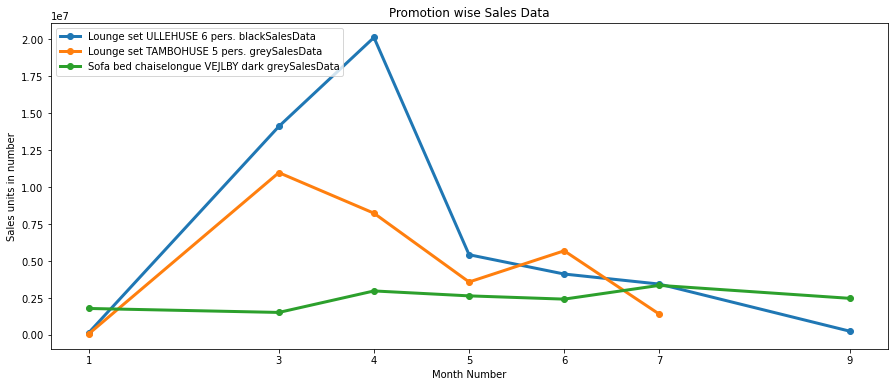

In [182]:
plt.figure(figsize = (15,6))

monthList = prod1['month'].tolist()
LoungeULLEHUSEblackSalesData = prod1['Lounge set ULLEHUSE 6 pers. black'].tolist()
LoungeTAMBOHUSEgreySalesData = prod1['Lounge set TAMBOHUSE 5 pers. grey'].tolist()
SofabedSalesData = prod1['Sofa bed chaiselongue VEJLBY dark grey'].tolist()

plt.plot(monthList, LoungeULLEHUSEblackSalesData  ,   label = 'Lounge set ULLEHUSE 6 pers. blackSalesData', marker='o', linewidth=3)
plt.plot(monthList, LoungeTAMBOHUSEgreySalesData , label = 'Lounge set TAMBOHUSE 5 pers. greySalesData', marker='o', linewidth=3)
plt.plot(monthList, SofabedSalesData, label = 'Sofa bed chaiselongue VEJLBY dark greySalesData', marker='o', linewidth=3)

plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper left')
plt.xticks(monthList)
#plt.yticks([50000.00, 500000.00, 1000000.00, 3000000.00 ,10000000.00, 15000000.00])
plt.title('Promotion wise Sales Data')
plt.show()

In [179]:
## Smallest

In [180]:
product_group1 = df.groupby('article_text')
product_group1.sales_excluding_tax.sum().nsmallest(10)

article_text
Wardrobe SALTOV 204x222 oak/black        -3200.0
Coffee table TAMHOLT 50x100 wh/natural    -800.0
BM GIMO 50x80cm natural KR                   0.0
COD BILLUND 3+3 white/concrete               0.0
COD JENSLEV 5 drawers slim oak               0.0
Coffee table KALVEHAVE Ø70 oak               0.0
DUV 525g MELDAL grey cool 150x210cm          0.0
End table KALVEHAVE Ø55 oak                  0.0
GT FLISBY 40x60cm white                      0.0
Inground trampoline FALK Ø396 w/net          0.0
Name: sales_excluding_tax, dtype: float64

In [181]:
prod4 = df.loc[df['article_text'] == ''] 
prod4.head(2)

,article,article_text,promo_page_number,promo_priority,promo_id,promo_name,promo_start_date,promo_end_date,sales_org,promo_number_of_pages,promo_duration_days,article_scale_price_historical,promo_promotion_sales_price,promo_standard_sales_price,sales_profit,sales_quantity,sales_excluding_tax,month
